In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



loading  datasets

In [3]:
train_data = pd.read_csv('/content/train_ctrUa4K.csv')
test_data = pd.read_csv('/content/test_lAUu6dG.csv')

loading head data of both datasets

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
loading tail data of both datasets

In [6]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


Understanding the columns

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:

test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Finding out how many unique values each columns contain:-

In [18]:
train_nunique_values_all = train_data.nunique()
test_nunique_values_all = test_data.nunique()


In [19]:
train_nunique_values_all

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
test_nunique_values_all

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [21]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

<Axes: xlabel='Loan_Status', ylabel='count'>

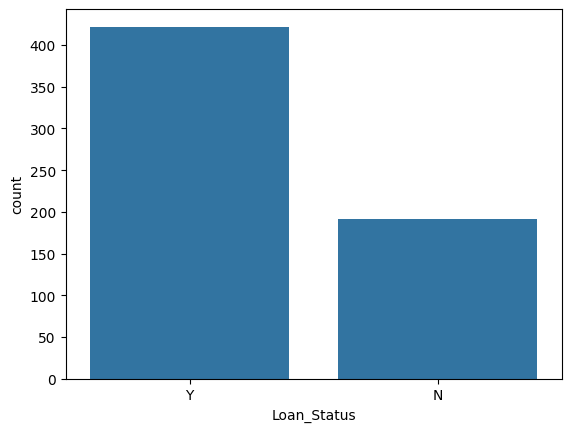

In [23]:
sns.countplot(x='Loan_Status',data=train_data)

 loan_status acceptence is higher than disapproval

Start of data preprocessing

In [24]:
train_data.drop('Loan_ID',axis=1,inplace=True)
test_data.drop('Loan_ID',axis=1,inplace=True)

In [25]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Replacing null values

In [27]:
object_columns = train_data.select_dtypes(include='object').columns[train_data.select_dtypes(include='object').isnull().any()]
for col in object_columns:
  mode_value = train_data[col].mode()[0]
  train_data[col].fillna(mode_value,inplace=True)


In [28]:
object_columns2 = test_data.select_dtypes(include='object').columns[test_data.select_dtypes(include='object').isnull().any()]
for col in object_columns2:
  mode_value = train_data[col].mode()[0]
  test_data[col].fillna(mode_value,inplace=True)


In [29]:
train_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
test_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [31]:
train_data.LoanAmount.skew()

2.677551679256059

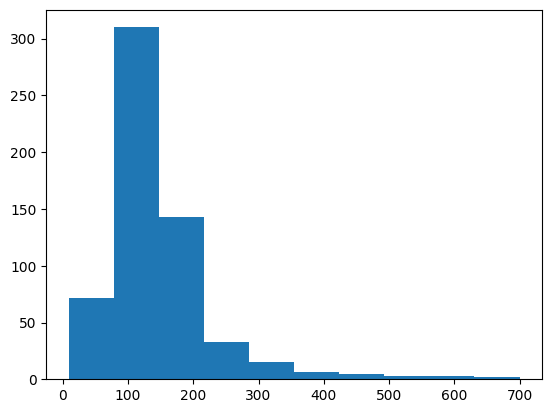

In [32]:
plt.hist(train_data['LoanAmount'])
plt.show()

In [34]:
train_data.Loan_Amount_Term.skew()

-2.362414124216269

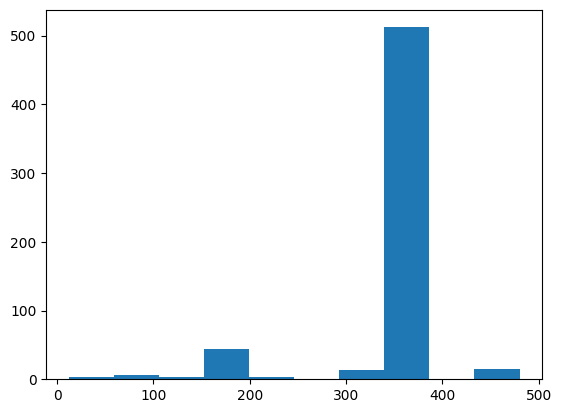

In [35]:
plt.hist(train_data['Loan_Amount_Term'])
plt.show()


In [36]:
train_data.Credit_History.skew()

-1.8823610612186696

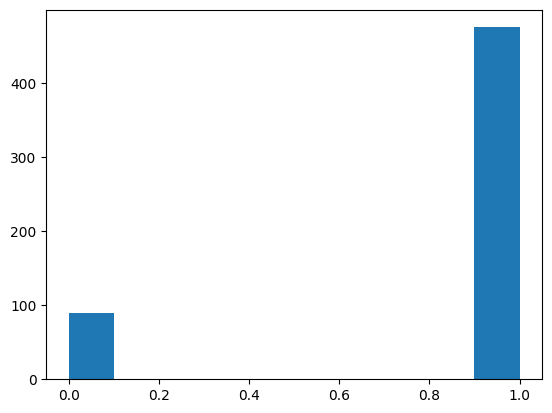

In [37]:
plt.hist(train_data['Credit_History'])
plt.show()

In [38]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(360.0,inplace=True)
train_data['Credit_History'].fillna(method='ffill', inplace=True)

In [39]:
train_data.isnull().sum()



Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
test_data.LoanAmount.skew()

2.223512207498288

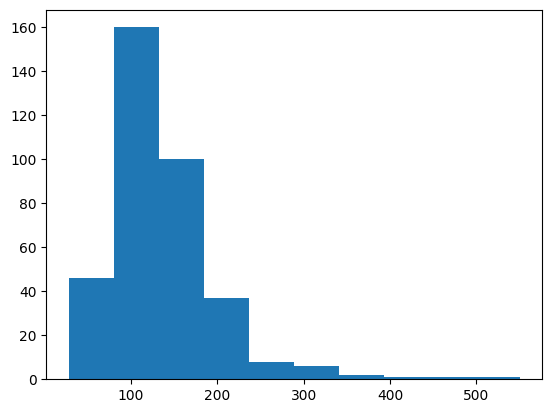

In [41]:
plt.hist(test_data['LoanAmount'])
plt.show()


In [42]:
test_data.Loan_Amount_Term.skew()

-2.679317770196837

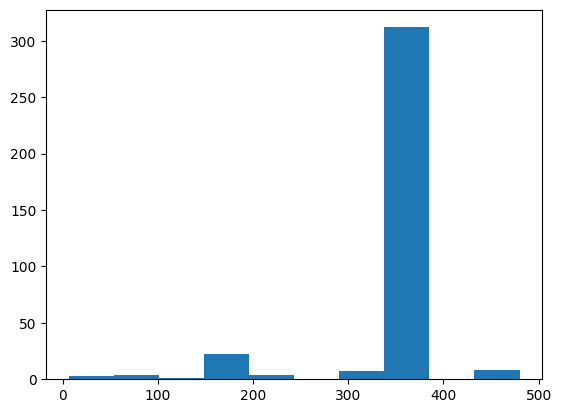

In [43]:
plt.hist(test_data['Loan_Amount_Term'])
plt.show()


In [44]:
test_data.Credit_History.skew()

-1.722378503506142

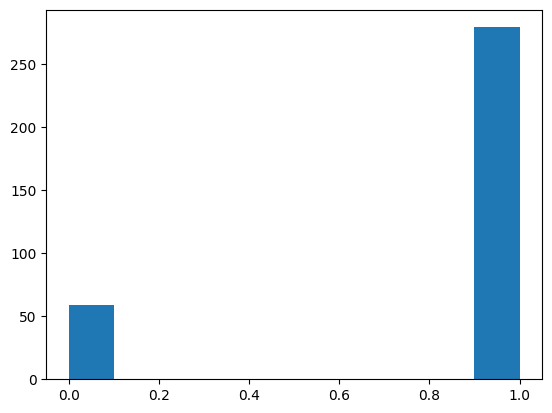

In [45]:
plt.hist(test_data['Credit_History'])
plt.show()

In [46]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(360.0,inplace=True)
test_data['Credit_History'].fillna(method='ffill', inplace=True)

In [47]:
test_data.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**OUTLIERS DETECTION**

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [49]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [50]:
train_data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [51]:
train_data.ApplicantIncome.skew()

6.539513113994625

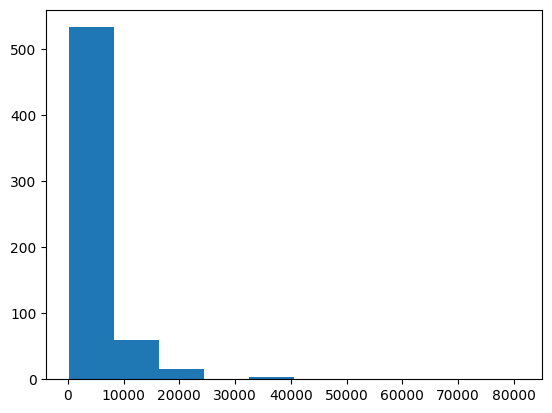

In [52]:
plt.hist(train_data['ApplicantIncome'])
plt.show()


In [53]:
train_data.CoapplicantIncome.skew()

7.491531216657306

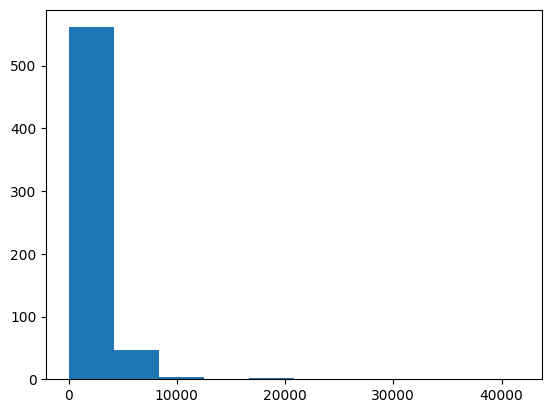

In [54]:

plt.hist(train_data['CoapplicantIncome'])
plt.show()


In [55]:
train_data.LoanAmount.skew()

2.743052748820892

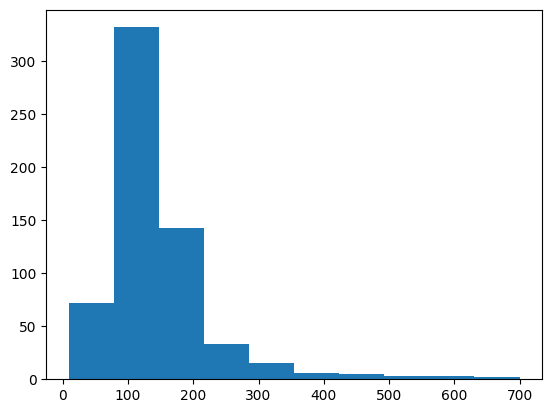

In [56]:
plt.hist(train_data['LoanAmount'])
plt.show()


In [57]:
train_data.Loan_Amount_Term.skew()

-2.4021122563890396

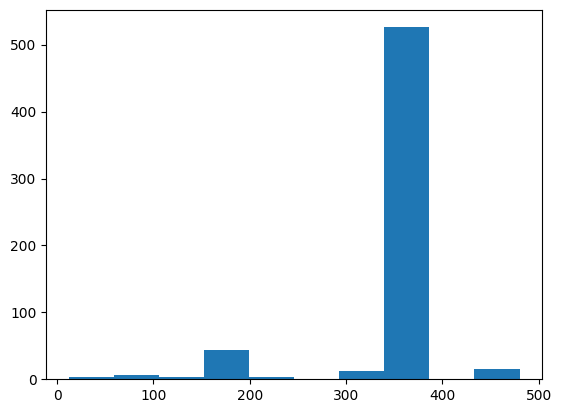

In [58]:
plt.hist(train_data['Loan_Amount_Term'])
plt.show()


In [59]:
train_data.Credit_History.skew()


-1.8144326292320414

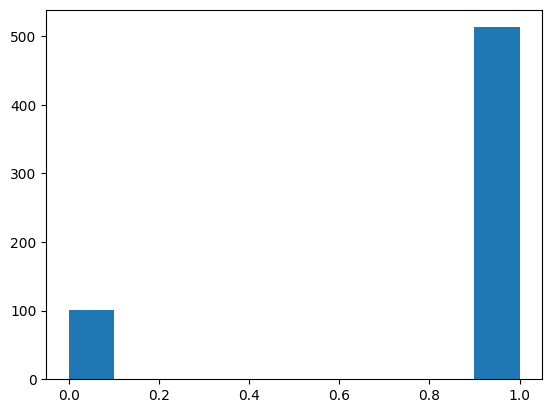

In [60]:
plt.hist(train_data['Credit_History'])
plt.show()


Since the data is skewed we apply IQR outlier **test**

In [61]:
new_columns1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']


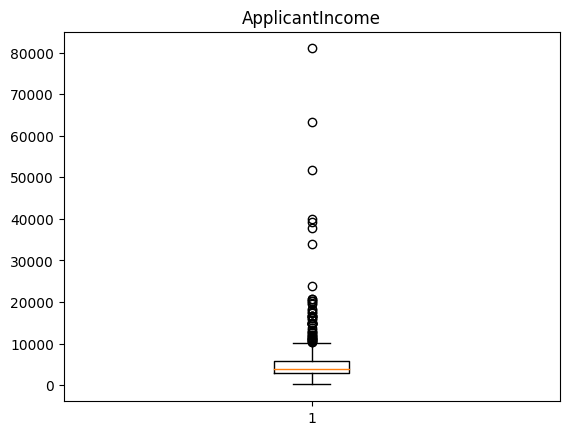

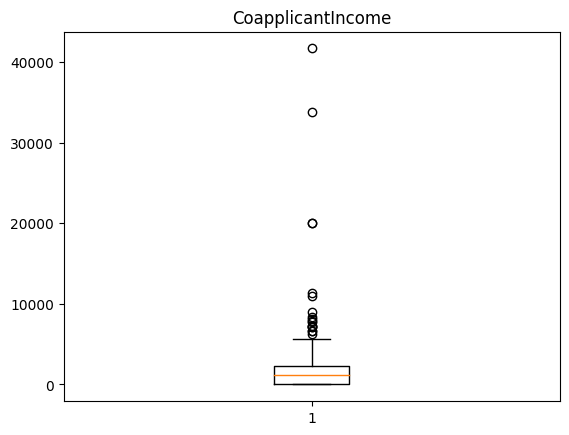

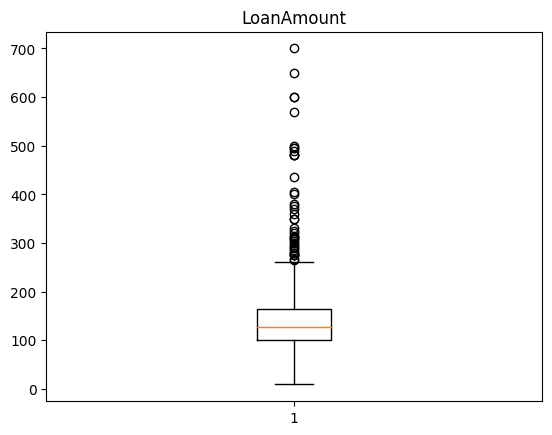

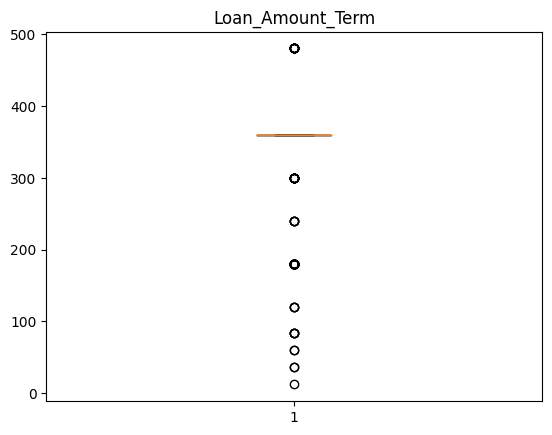

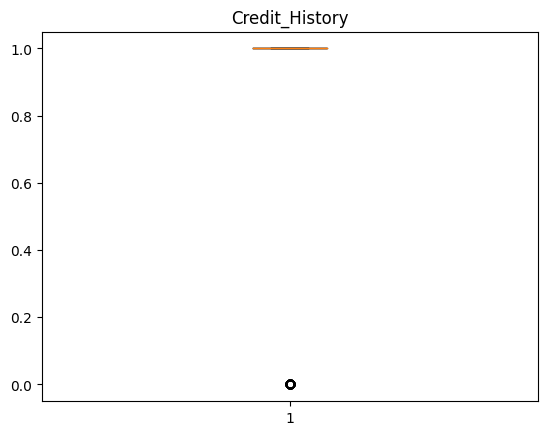

In [62]:
for i in new_columns1:
  plt.figure(i)
  plt.boxplot(train_data[i])
  plt.title(i);


In [63]:
new_columns2 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']


In [64]:
for j in new_columns2:
    Q1=np.percentile(train_data[j],25,method='midpoint')
    Q2=np.percentile(train_data[j],50,method='midpoint')
    Q3=np.percentile(train_data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in train_data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    train_data[j]=train_data[j].clip(lower=low_lim,upper=up_lim)


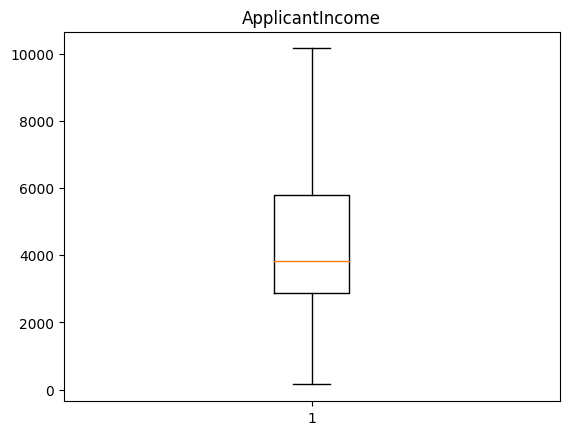

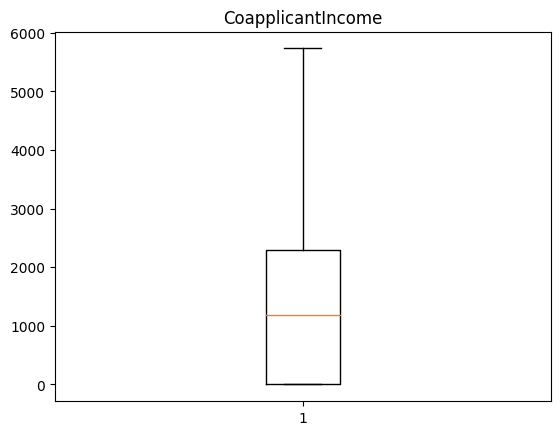

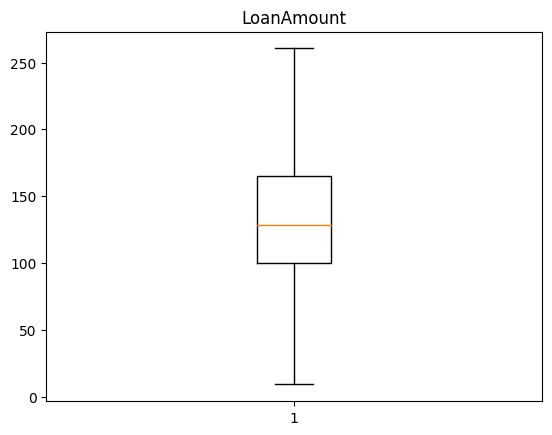

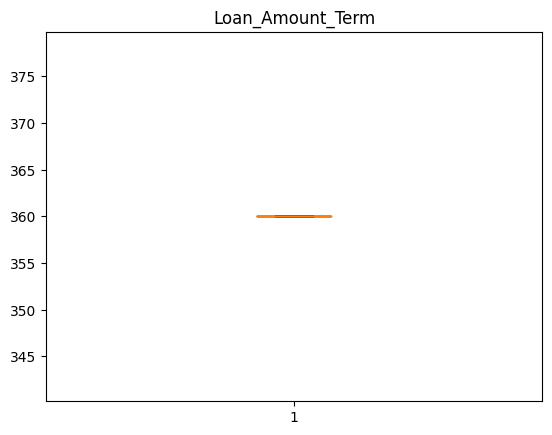

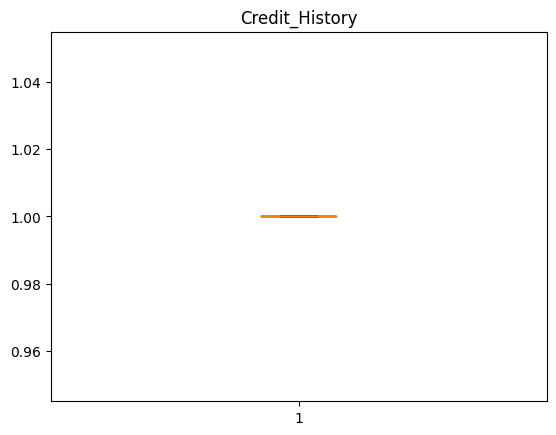

In [65]:
new_columns3 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns3:
  plt.figure(i)
  plt.boxplot(train_data[i])
  plt.title(i);

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


OULIER DETECTION ON **TEST_DATA**

In [67]:
test_data.ApplicantIncome.skew()

8.441374954190996

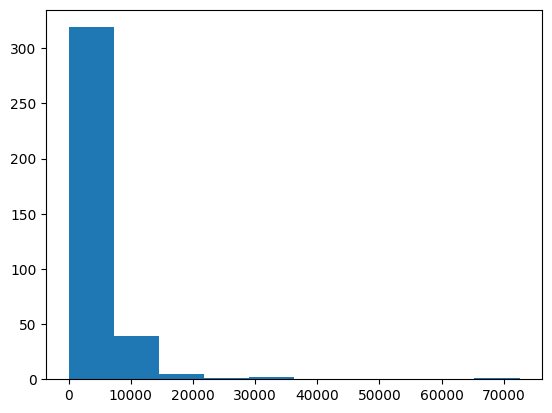

In [68]:
plt.hist(test_data['ApplicantIncome'])
plt.show()


In [69]:
test_data.CoapplicantIncome.skew()

4.257356934477602

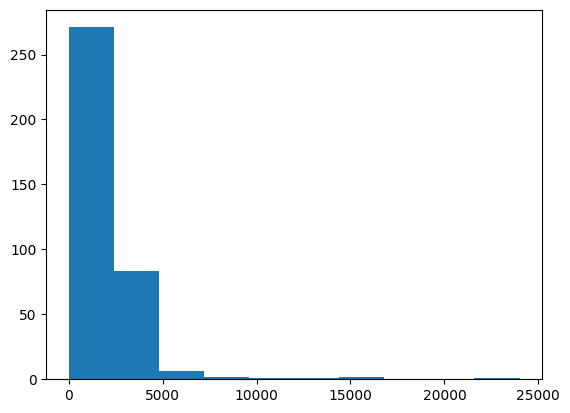

In [70]:
plt.hist(test_data['CoapplicantIncome'])
plt.show()

In [71]:
test_data.LoanAmount.skew()

2.244600521260248

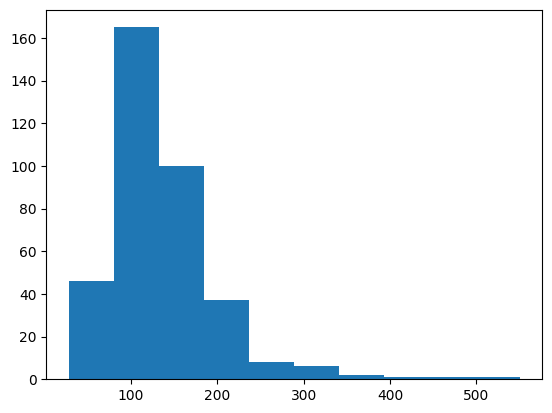

In [72]:
plt.hist(test_data['LoanAmount'])
plt.show()


In [73]:
test_data.Loan_Amount_Term.skew()

-2.709536758573826

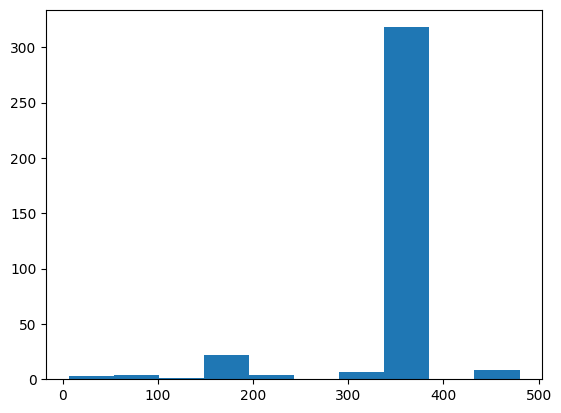

In [74]:
plt.hist(test_data['Loan_Amount_Term'])
plt.show()

In [75]:
test_data.Credit_History.skew()


-1.8006162449696541

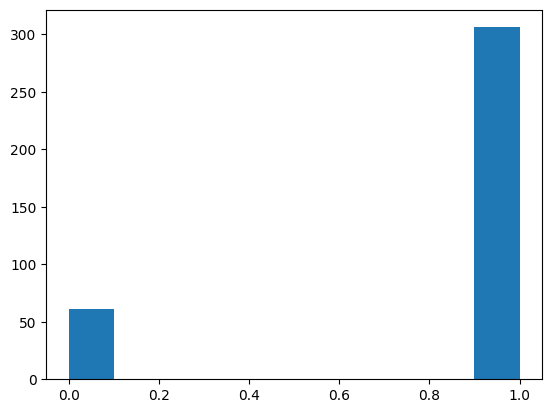

In [76]:
plt.hist(test_data['Credit_History'])
plt.show()


Applying IQR TEST on test set as the values are skewed.

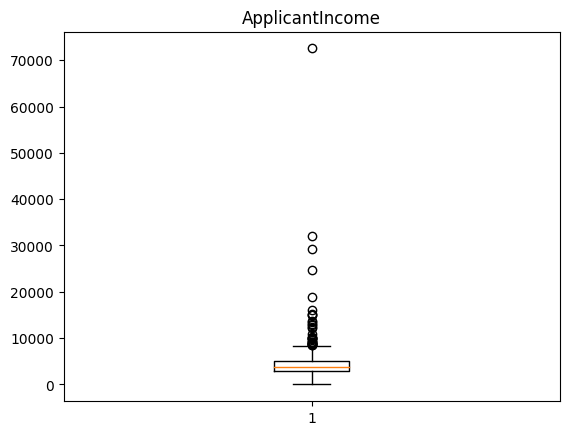

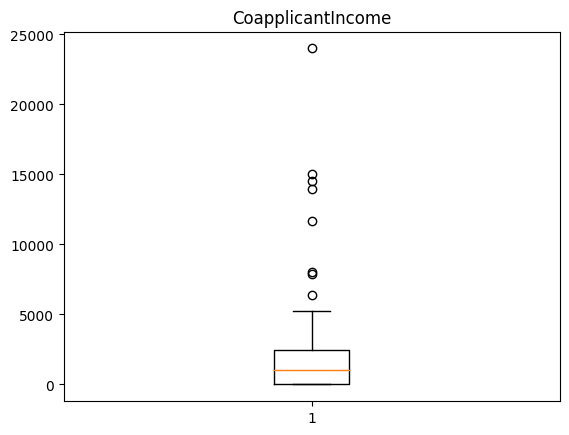

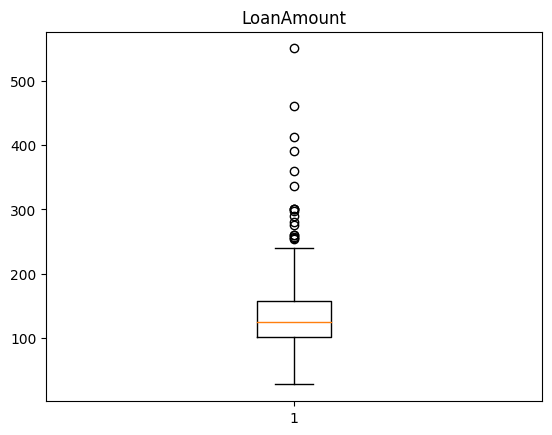

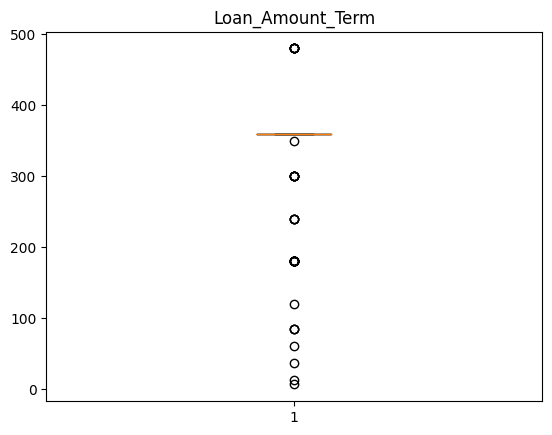

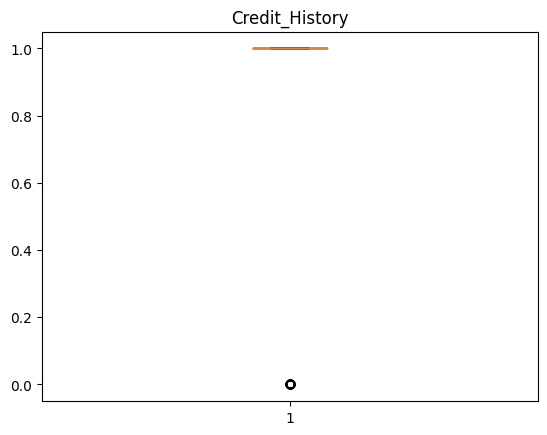

In [77]:
new_columns4 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns4:
  plt.figure(i)
  plt.boxplot(test_data[i])
  plt.title(i);



In [78]:
new_columns5 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for j in new_columns5:
    Q1=np.percentile(test_data[j],25,method='midpoint')
    Q2=np.percentile(test_data[j],50,method='midpoint')
    Q3=np.percentile(test_data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in train_data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    test_data[j]=test_data[j].clip(lower=low_lim,upper=up_lim)

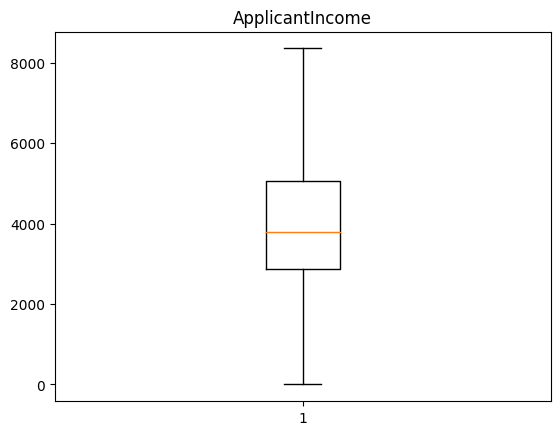

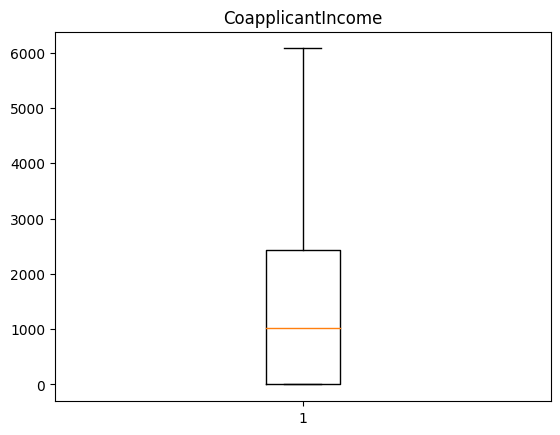

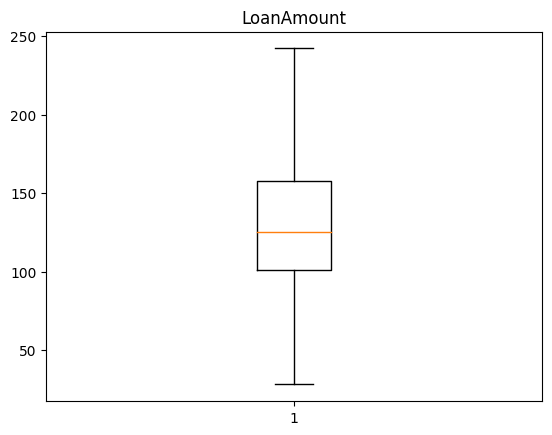

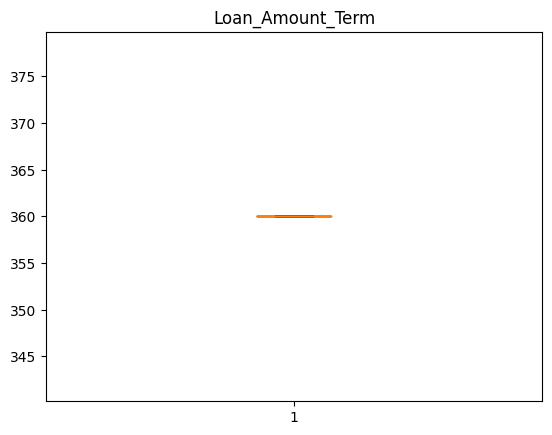

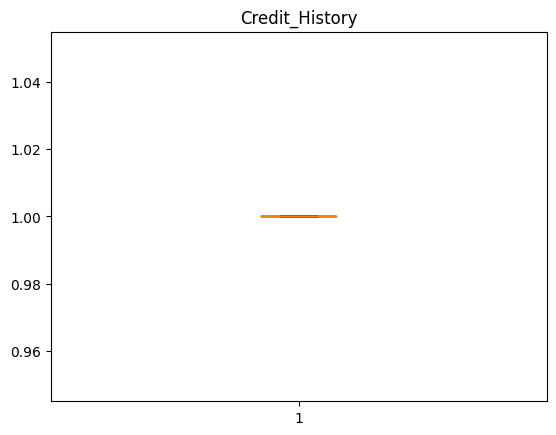

In [79]:
new_columns6 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns6:
  plt.figure(i)
  plt.boxplot(test_data[i])
  plt.title(i);


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 31.7+ KB


In [81]:
train_data.corr()

<ipython-input-81-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.229124,0.557597,NaN,NaN
CoapplicantIncome,-0.229124,1.000000,0.264989,NaN,NaN
LoanAmount,0.557597,0.264989,1.000000,NaN,NaN
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN


<ipython-input-82-35df01d0cfc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),cmap="YlGnBu",annot=True)


<Axes: >

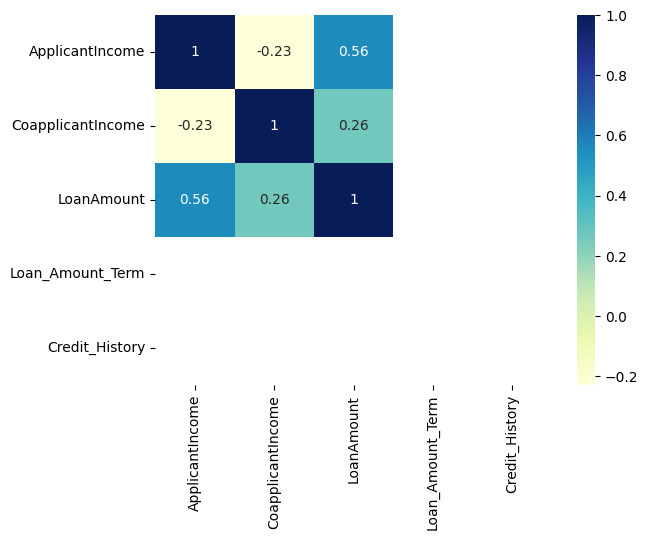

In [82]:
sns.heatmap(train_data.corr(),cmap="YlGnBu",annot=True)

In [83]:
test_data.corr()

<ipython-input-83-861ec38ca07d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.253653,0.458722,NaN,NaN
CoapplicantIncome,-0.253653,1.000000,0.194046,NaN,NaN
LoanAmount,0.458722,0.194046,1.000000,NaN,NaN
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN


<ipython-input-84-f659280e45b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(),cmap="YlGnBu",annot=True)


<Axes: >

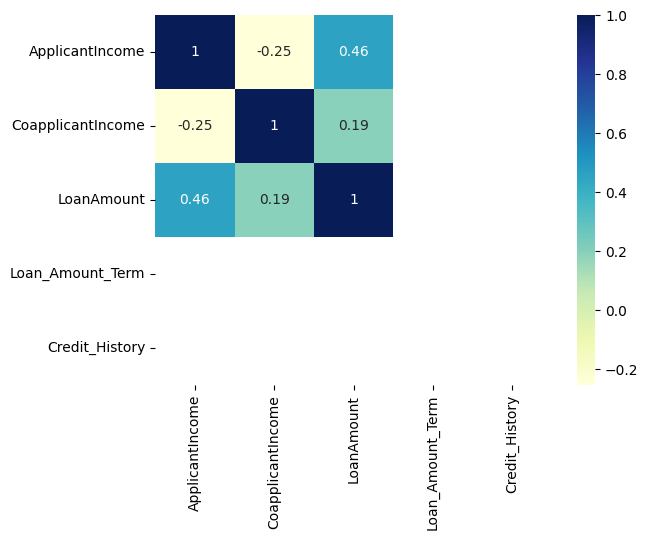

In [84]:
sns.heatmap(test_data.corr(),cmap="YlGnBu",annot=True)

ONE HOT **ENCODING**

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [86]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 31.7+ KB


 SEPERATE FEATURES AND THE TARGET VARIABLE


In [87]:
X_train = train_data.drop('Loan_Status',axis=1)
y_train = train_data['Loan_Status']
X_test = test_data.copy()



In [88]:
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)


In [89]:
X_train_encode.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [90]:
X_test_encode.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800.0,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546.0,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0.0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encode)
X_train_scaled = pd.DataFrame(X_train_encode)


In [92]:
X_train_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4615.910423,1419.354104,137.298860,360.0,1.0,0.182410,0.817590,0.346906,0.653094,0.586319,0.166124,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,2477.158964,1623.678913,55.631264,0.0,0.0,0.386497,0.386497,0.476373,0.476373,0.492894,0.372495,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.0,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,10156.500000,5731.250000,260.500000,360.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_encode)
X_test_scaled = pd.DataFrame(X_test_encode)



In [94]:
X_test_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,367.000000,367.000000,367.000000,367.0,367.0,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4238.964578,1425.501362,131.957766,360.0,1.0,0.190736,0.809264,0.365123,0.634877,0.572207,0.158038,0.160763,0.108992,0.771117,0.228883,0.899183,0.100817,0.302452,0.316076,0.381471
std,1950.976357,1600.086250,46.926185,0.0,0.0,0.393417,0.393417,0.482122,0.482122,0.495434,0.365275,0.367814,0.312054,0.420687,0.420687,0.301498,0.301498,0.459947,0.465578,0.486411
min,0.000000,0.000000,28.000000,360.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3786.000000,1025.000000,125.000000,360.0,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5060.000000,2430.500000,157.500000,360.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,8354.000000,6076.250000,242.250000,360.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 modelling Using 1.Logistic Regression, 2.KNN, 3.SVM, 4.Decision Tree, 5.Random Forest

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [96]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [97]:
print("\nModel Training and Evaluation:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"{name} Accuracy on Train Data: {accuracy_train}")



Model Training and Evaluation:
Logistic Regression Accuracy on Train Data: 0.6938110749185668
KNN Accuracy on Train Data: 0.7312703583061889
SVM Accuracy on Train Data: 0.6872964169381107
Decision Tree Accuracy on Train Data: 0.996742671009772
Random Forest Accuracy on Train Data: 0.996742671009772


In [99]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"{name} Accuracy on Train Data: {accuracy_train}")
 # Calculate precision, recall, F1 score, and confusion matrix
    print(f"\n{name} Metrics:")
    print(classification_report(y_train, y_pred_train))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_pred_train)}")

Logistic Regression Accuracy on Train Data: 0.6938110749185668

Logistic Regression Metrics:
              precision    recall  f1-score   support

           N       0.58      0.08      0.14       192
           Y       0.70      0.97      0.81       422

    accuracy                           0.69       614
   macro avg       0.64      0.53      0.48       614
weighted avg       0.66      0.69      0.60       614

Confusion Matrix:
[[ 15 177]
 [ 11 411]]
KNN Accuracy on Train Data: 0.7312703583061889

KNN Metrics:
              precision    recall  f1-score   support

           N       0.62      0.35      0.45       192
           Y       0.75      0.90      0.82       422

    accuracy                           0.73       614
   macro avg       0.69      0.63      0.64       614
weighted avg       0.71      0.73      0.71       614

Confusion Matrix:
[[ 68 124]
 [ 41 381]]
SVM Accuracy on Train Data: 0.6872964169381107

SVM Metrics:
              precision    recall  f1-score   sup

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           N       0.99      0.99      0.99       192
           Y       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix:
[[191   1]
 [  1 421]]
Random Forest Accuracy on Train Data: 0.996742671009772

Random Forest Metrics:
              precision    recall  f1-score   support

           N       1.00      0.99      0.99       192
           Y       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      0.99      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix:
[[190   2]
 [  0 422]]


In [100]:
from sklearn.model_selection import train_test_split, GridSearchCV



Random forest as best model
Step 4: Fine Tuning

In [101]:
# (Hyperparameter tuning for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [102]:
print("\nBest Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


predictions using the fine-tuned Random Forest model

In [103]:
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test_scaled)

Adding sample_submission file to the work worksheet

In [105]:
sample_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [106]:
sample_submission.head(15)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N


In [107]:
sample_submission.tail(15)


,Loan_ID,Loan_Status
352,LP002907,N
353,LP002920,N
354,LP002921,N
355,LP002932,N
356,LP002935,N
357,LP002952,N
358,LP002954,N
359,LP002962,N
360,LP002965,N
361,LP002969,N


In [108]:
sample_submission['Loan_Status'] = predictions

In [109]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [110]:
sample_submission.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [111]:
# Save the updated dataset as a CSV file
sample_submission.to_csv('Updated_submission.csv', index=False)

In [112]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
